In [36]:
import os
%matplotlib inline 
import matplotlib.pyplot as plt #1st usage chap 1
import numpy as np #1st usage chap 1
import pandas as pd #1st usage chap 1
import scipy.stats as stats #1st usage chap 2
from scipy.stats import linregress #1st usage chap 2
from pandas import Series, DataFrame #1st usage chap 3
import numpy.random as rnd #1st usage chap 3

# Chapter 1
- Overview of the tools available for data analysis in Python
- How to read data files, select data, and produce simple plots, instead of delving into numerical data analysis

In [2]:
plt.style.use('classic')

In [3]:
cols = ['user id', 'item id', 'rating', 'timestamp']
ratings = pd.read_csv('data/ratings.dat', sep='::',index_col=False, names=cols,encoding="UTF-8")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
ratings.head()

,user id,item id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639
2,2,104257,8,1364690142
3,2,1259521,8,1364118447
4,2,1991245,7,1364117717


In [5]:
rating_counts = ratings['rating'].value_counts()
rating_counts

8     12012
7     11063
9      7119
6      6373
10     6281
5      3399
4      1696
3       924
1       595
2       533
0         5
Name: rating, dtype: int64

In [6]:
sorted_counts = rating_counts.sort_index()
sorted_counts

0         5
1       595
2       533
3       924
4      1696
5      3399
6      6373
7     11063
8     12012
9      7119
10     6281
Name: rating, dtype: int64

Text(0,0.5,'Count')

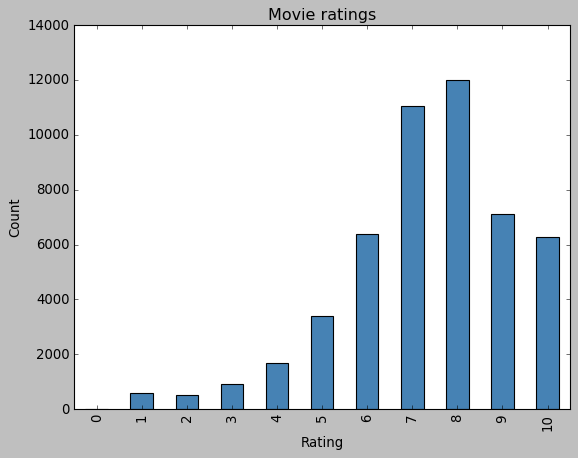

In [7]:
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

**Ratings distribution for a particular movie genre,say "Crime Drama", is similar to the overall distribution.**

In [8]:
cols = ['movie id','movie title','genre']
movies = pd.read_csv('data/movies.dat', sep='::',index_col=False, names=cols,encoding="UTF-8")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [9]:
movies.head()

,movie id,movie title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,7264,The Rink (1916),Comedy|Short
3,8133,The Immigrant (1917),Short|Comedy|Drama|Romance
4,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance


In [10]:
cridra=movies[movies['genre']=='Crime|Drama']

In [11]:
is_cridra = movies['genre']== 'Crime|Drama'
is_cridra.head()

0     True
1    False
2    False
3    False
4    False
Name: genre, dtype: bool

In [12]:
cridra_ids=cridra['movie id']
cridra_ids.head()

0       2844
54     23817
208    40522
236    42876
251    44515
Name: movie id, dtype: int64

In [13]:
criterion = ratings['item id'].map(lambda x: (cridra_ids == x).any())
cridra_ratings = ratings[criterion]
cridra_ratings.head()

,user id,item id,rating,timestamp
128,18,86066,10,1363985505
150,23,1212450,8,1364166586
176,26,1817273,8,1367761386
194,36,68646,9,1364834910
195,36,71562,10,1365005772


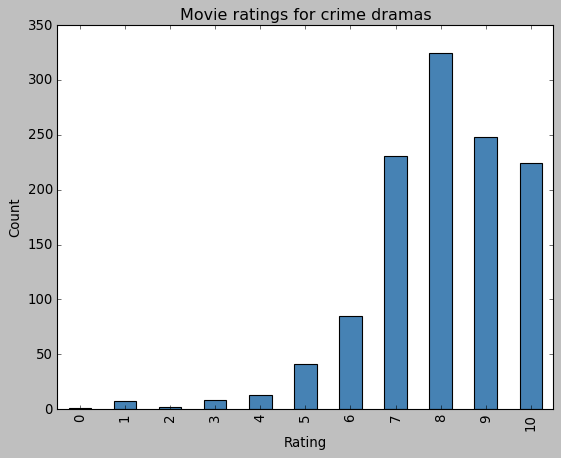

In [14]:
rating_counts = cridra_ratings['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings for crime dramas')
plt.xlabel('Rating')
plt.ylabel('Count');

# Chapter 2
- How to use Pandas to perform an initial exploration of the data.
- Performing the initial exploration and cleaning of data
- Displays of data, including histograms, KDE (kernel density estimate) plots and boxplots forunivariate distributions, and scatterplots for bivariate relationships.
- Giving an initial overview of various point estimates of the data, such as mean, standard deviation, range, median, quartiles, and percentiles.

In [15]:
gss_data = pd.read_stata('data/GSS2012merged_R5.dta', convert_categoricals=False)
gss_data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,1,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,3,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,4,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
gss_data.set_index('id')
gss_data.drop('id', 1, inplace=True)
gss_data.head()

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,marital,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
gss_data.to_csv('data/GSS2012merged.csv')

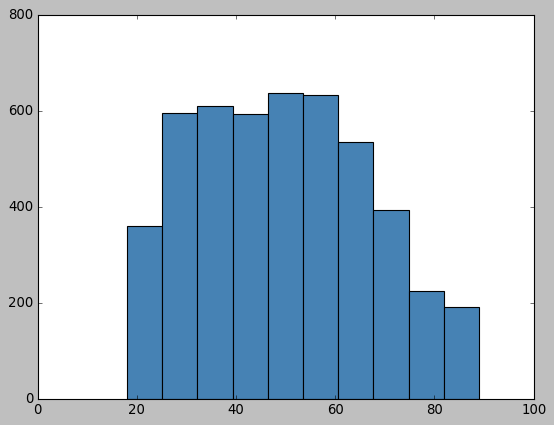

In [18]:
gss_data['age'].hist(color='SteelBlue')
plt.grid()
plt.locator_params(nbins=5)

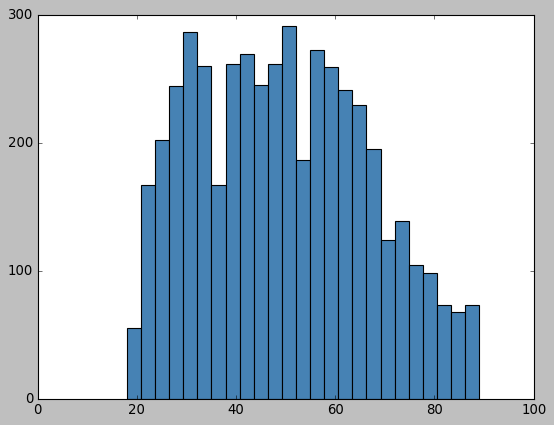

In [19]:
gss_data['age'].hist(bins=25, color='SteelBlue')
plt.grid()
plt.locator_params(nbins=5)

In [20]:
inc_age = gss_data[['realrinc','age']]
inc_age.head(10)

,realrinc,age
0,NaN,22.0
1,NaN,21.0
2,58800.0,42.0
3,NaN,49.0
4,NaN,70.0
5,NaN,50.0
6,NaN,35.0
7,NaN,24.0
8,NaN,28.0
9,15925.0,28.0


In [21]:
inc_age = gss_data[['realrinc','age']].dropna()
inc_age.head(10)

,realrinc,age
2,58800.0,42.0
9,15925.0,28.0
11,3185.0,36.0
14,7962.5,52.0
15,26950.0,35.0
16,26950.0,36.0
17,22050.0,47.0
18,33075.0,55.0
22,33075.0,54.0
23,49000.0,45.0


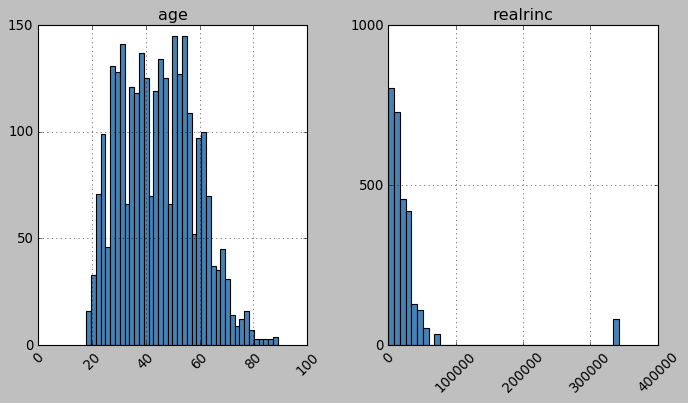

In [22]:
ax_list = inc_age.hist(bins=40, figsize=(10,5), xrot=45, color='SteelBlue')
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [23]:
inc_age[inc_age['realrinc'] > 3.0E5].count()

realrinc    80
age         80
dtype: int64

In [24]:
inc_age[inc_age['realrinc'] >3.0E5].head(10)

,realrinc,age
42,341672.3793,51.0
43,341672.3793,57.0
44,341672.3793,44.0
47,341672.3793,68.0
54,341672.3793,46.0
126,341672.3793,53.0
241,341672.3793,61.0
261,341672.3793,55.0
263,341672.3793,43.0
401,341672.3793,37.0


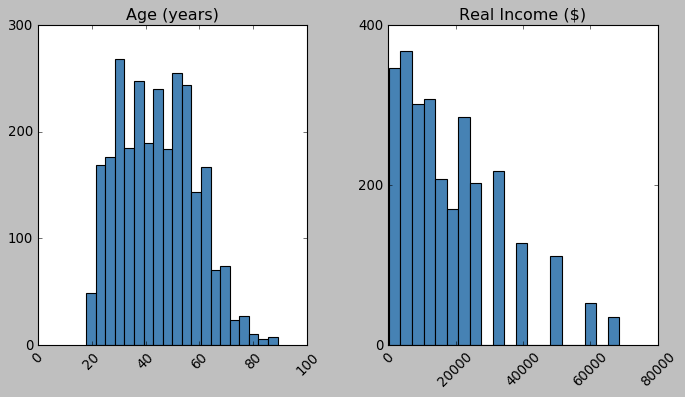

In [25]:
lowinc_age = inc_age[inc_age['realrinc'] <3.0E5]
ax_list = lowinc_age.hist(bins=20, figsize=(10,5), xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income ($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x' ,nbins=6)
    ax.locator_params(axis='y' ,nbins=3)

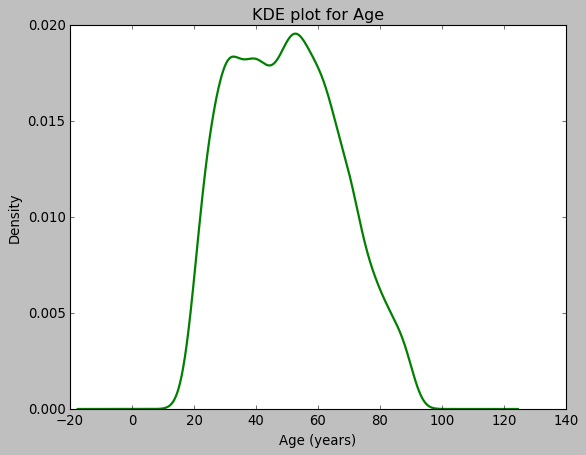

In [26]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw=2, color='green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)');

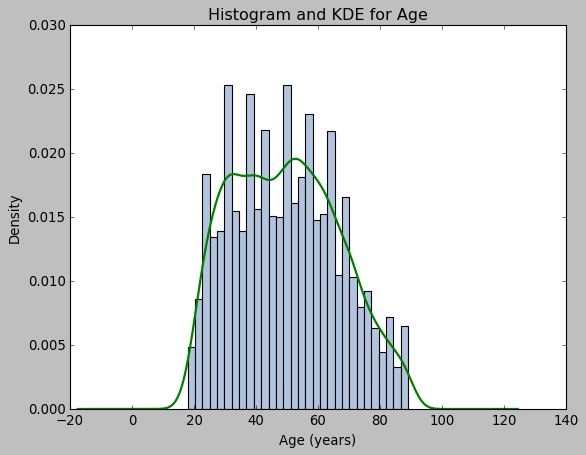

In [27]:
ax = age.hist(bins=30, color='LightSteelBlue', density=True)
age.plot(kind='kde', lw=2, color='Green', ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)');

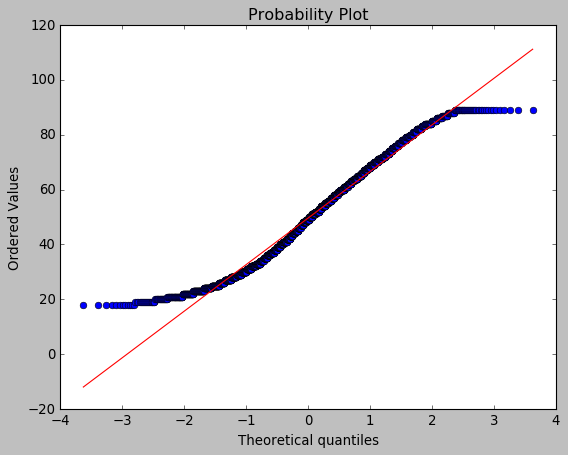

In [28]:
stats.probplot(age, dist='norm', plot=plt);

In [29]:
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc <3.0E5]
lowinc.describe(percentiles=np.arange(0, 1.0, 0.1))

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
0%         245.000000
10%       2695.000000
20%       5512.500000
30.0%     9187.500000
40%      11637.500000
50%      15925.000000
60.0%    18375.000000
70%      22050.000000
80%      26950.000000
90%      40425.000000
max      68600.000000
Name: realrinc, dtype: float64

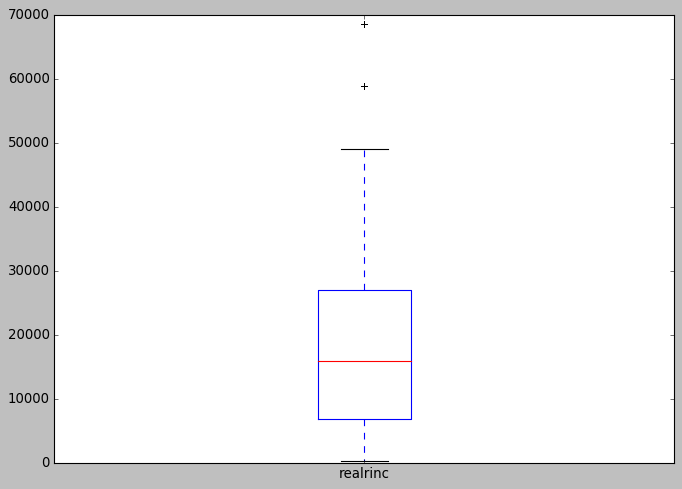

In [30]:
lowinc.plot(kind='box', figsize=(10,7));#Histogram+kind='hist' ; KDE=kind='kde'

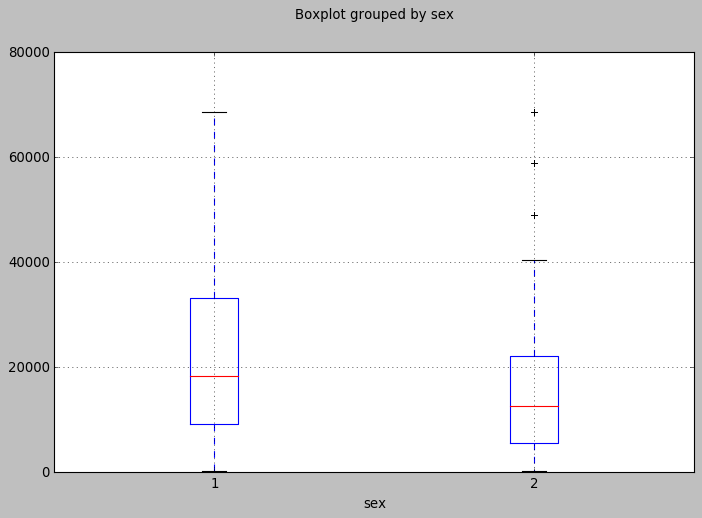

In [31]:
inc_gen = gss_data[['realrinc','sex']]
inc_gen = inc_gen[inc_gen['realrinc'] < 3.0E5]
inc_gen.boxplot(column='realrinc', by='sex',figsize=(10,7))
plt.title('')
plt.locator_params(nbins=5);

In [32]:
hubble_data = pd.read_csv('data/hubble.csv', skiprows=2, names=['id', 'r', 'v'])
hubble_data.head()

,id,r,v
0,SMC,0.032,170
1,5194,0.500,270
2,1055,1.100,450
3,LMC,0.034,290
4,4449,0.630,200


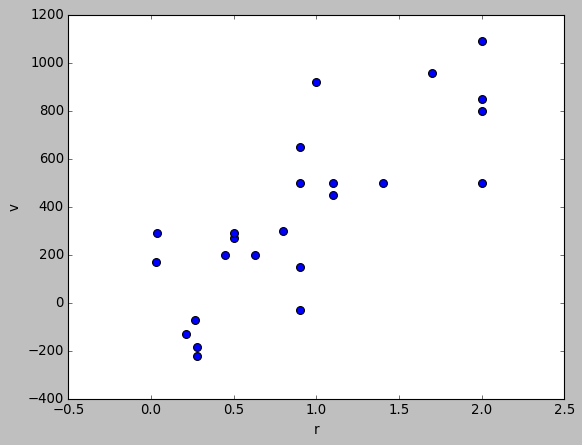

In [33]:
hubble_data.plot(kind='scatter', x='r',y='v', s=50);

In [34]:
rv = hubble_data.as_matrix(columns=['r','v'])
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)

454.15844092262836 -40.78364909586037 0.7896394879353182 4.477491000609172e-06 75.23710534716909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


> a: This is the slope of the regression line
b: This is the intercept of the regression line
r: This is the correlation coefficient
p: This is the two-sided p-value for the hypotheses test-for the null hypothesis that
assumes the slope is zero
stderr: This is the standard error of the estimate

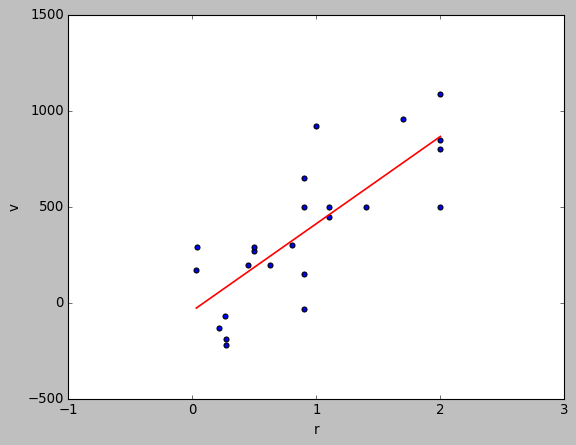

In [35]:
hubble_data.plot(kind='scatter', x='r', y='v')
rdata = hubble_data['r']
rmin, rmax = min(rdata), max(rdata)
rvalues = np.linspace(rmin, rmax, 200)
yvalues = a * rvalues + b
plt.plot(rvalues, yvalues, color='red', lw=1.5)
plt.locator_params(nbins=5);

# Chapter 3
- Using basic models in data analysis
- Using the cumulative distribution function and probability density function to characterize a variable
- Using the preceding functions and various tools to make point estimates and generating random numbers with a certain distribution
- Discussing examples of discrete and continuous random variables and an overview of multivariate distributions

In [37]:
mean = 0
sdev = 1
nvalues = 10
norm_variate = mean + sdev * rnd.randn(nvalues)
print(norm_variate)

[-0.21387078  1.00524681  1.3603041  -1.72303886  1.01723863  0.25396534
 -1.97109358  0.67441725  0.54361762 -0.68735331]


In [39]:
for i, v in enumerate(sorted(norm_variate), start=1):
    print('{0:2d} {1:+.4f}'.format(i, v))

 1 -1.9711
 2 -1.7230
 3 -0.6874
 4 -0.2139
 5 +0.2540
 6 +0.5436
 7 +0.6744
 8 +1.0052
 9 +1.0172
10 +1.3603


In [41]:
def plot_cdf(data, plot_range=None, scale_to=None, **kwargs):
    num_bins= len(data)
    sorted_data = np.array(sorted(data), dtype=np.float64)
    data_range = sorted_data[-1] - sorted_data[0]
    counts, bin_edges = np.histogram(sorted_data, bins=num_bins)
    xvalues = bin_edges[1:]
    yvalues = np.cumsum(counts)
    if plot_range is None:
        xmin = xvalues[0]
        xmax = xvalues[-1]
    else:
        xmin, xmax = plot_range
    # pad the arrays
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]])
    yvalues = np.concatenate([[0.0, 0.0],        yvalues, [yvalues.max()]])
    if scale_to:
        yvalues = yvalues / len(data) * scale_to
    plt.axis([xmin, xmax, 0, yvalues.max()])
    return plt.step(xvalues, yvalues, **kwargs)

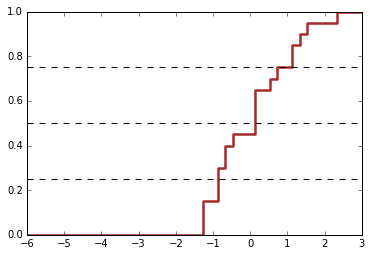

In [42]:
nvalues = 20
#rnd.seed(123) # to get identical results every time
norm_variates = rnd.randn(nvalues)
axes = plot_cdf(norm_variates, plot_range=[-6,3], scale_to=1., 
         lw=2.5, color='Brown')
for v in [0.25, 0.5, 0.75, 1.0]:
    plt.axhline(v, lw=1, ls='--', color='black')

In [46]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt', sep='\n', dtype=np.int64)
print(wing_lengths)

[36 37 38 38 39 39 40 40 40 40 41 41 41 41 41 41 42 42 42 42 42 42 42 43
 43 43 43 43 43 43 43 44 44 44 44 44 44 44 44 44 45 45 45 45 45 45 45 45
 45 45 46 46 46 46 46 46 46 46 46 46 47 47 47 47 47 47 47 47 47 48 48 48
 48 48 48 48 48 49 49 49 49 49 49 49 50 50 50 50 50 50 51 51 51 51 52 52
 53 53 54 55]


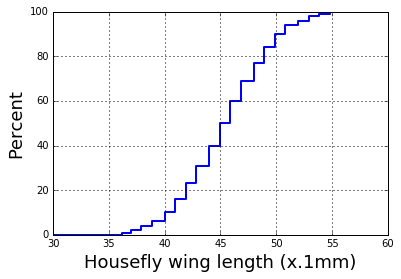

In [47]:
plot_cdf(wing_lengths, plot_range=[30, 60], scale_to=100, lw=2)
plt.grid(lw=1)
plt.xlabel('Housefly wing length (x.1mm)', fontsize=18)
plt.ylabel('Percent', fontsize=18);

###### Scipy.stats Methods
|Function | Description|
|:---------| :-----------|
|rvs()  | Random variates, that is, pseudorandom number generation|
|cdf()  | Cumulative distribution function|
|pdf() or pmf() | Probability density function (for continuous variables) and probability mass function (for discrete variables)|
|ppf() | Percent point function, the inverse of the cumulative distribution function|
|stats() | Compute statistics (moments) for distribution|
|mean(), std(),or var() | Compute mean, standard deviation, and variance, respectively|
|fit() | Fit data to the distribution and return the parameters for the shape,location, and scale parameters from the data|

In [48]:
N = 4857
mean = 63.8
serror = 0.06
sdev = serror * np.sqrt(N)
rvnorm = stats.norm(loc=mean, scale=sdev)

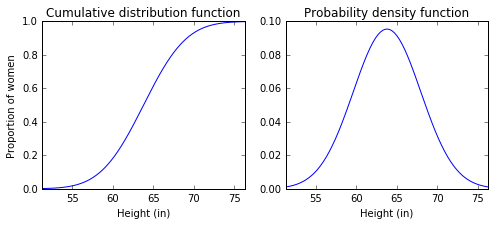

In [50]:
xmin = mean-3*sdev
xmax = mean+3*sdev
xx = np.linspace(xmin,xmax,200)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvnorm.cdf(xx))
plt.title('Cumulative distribution function')
plt.xlabel('Height (in)')
plt.ylabel('Proportion of women')
plt.axis([xmin, xmax, 0.0, 1.0])
plt.subplot(1,2,2)
plt.plot(xx, rvnorm.pdf(xx))
plt.title('Probability density function')
plt.xlabel('Height (in)')
plt.axis([xmin, xmax, 0.0, 0.1]);

In [51]:
rvnorm.cdf(68)

0.8424111333807798

In [52]:
rvnorm.cdf(63)

0.4241384277767544

In [53]:
100 * (rvnorm.cdf(68) - rvnorm.cdf(63))

41.82727056040253

In [54]:
categories = [
    ('Petite', 59, 63),
    ('Average', 63, 68),
    ('Tall', 68, 71),
]
for cat, vmin, vmax in categories:
    percent = 100*(rvnorm.cdf(vmax)-rvnorm.cdf(vmin))
    print('{0:>8s}: {1:.2f}'.format(cat, percent))

  Petite: 29.86
 Average: 41.83
    Tall: 11.50


In [61]:
too_short = 100*rvnorm.cdf(59)
too_tall = 100*(1 - rvnorm.cdf(71))
unclassified = too_short + too_tall
print(too_short, too_tall, unclassified)

12.55038986608284 4.254767214713451 16.805157080796292


In [62]:
a = rvnorm.ppf(0.25)
b = rvnorm.ppf(0.75)
print (a, b)

60.97960032166886 66.62039967833113


- The mean is the average value of the distribution. As the distribution is symmetric, it coincides with the median.
- The variance is the square of the standard deviation. It is defined as the average value of the square of the deviation from the mean.
- The skew measures the asymmetry of the distribution. As the Normal distribution is symmetric, the skew is zero.
- The kurtosis indicates how the distribution peaks: does it have a sharp peak or a flatter bump? The value of kurtosis for the Normal distribution is zero because it is used as a reference distribution.

In [63]:
mean, variance, skew, kurtosis = rvnorm.stats(moments='mvks')
print(mean, variance, skew, kurtosis)

63.8 17.485200000000003 0.0 0.0


In [65]:
eta = 1.0
beta = 1.5
rvweib = stats.weibull_min(beta, scale=eta)

In [66]:
weib_variates = rvweib.rvs(size=500)
print(weib_variates[:10])

[0.48097966 0.20008098 0.3497712  0.33179194 0.33016503 1.765763
 1.0423383  1.03358911 0.66769483 0.6848068 ]


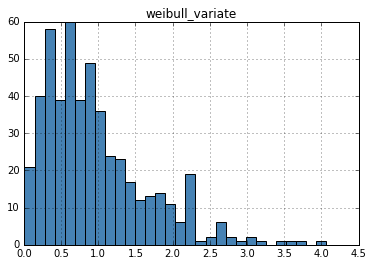

In [68]:
weib_df = DataFrame(weib_variates,columns=['weibull_variate'])
weib_df.hist(bins=30,color='steelblue');

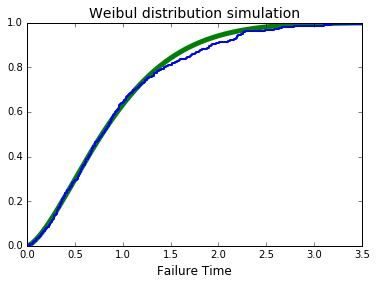

In [71]:
xmin = 0
xmax = 3.5
xx = np.linspace(xmin,xmax,200)
plt.plot(xx, rvweib.cdf(xx), color='orange', lw=5)
plot_cdf(weib_variates, plot_range=[xmin, xmax], scale_to=1, lw=2,
color='green')
plt.axis([xmin, xmax, 0, 1])
plt.title('Weibul distribution simulation', fontsize=14)
plt.xlabel('Failure Time', fontsize=12);

In [72]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt', sep='\n', dtype=np.int64)
mean, std = stats.norm.fit(wing_lengths)
print(mean, std)

45.5 3.9


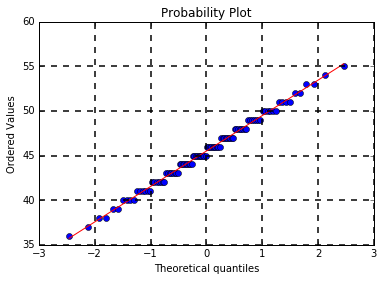

In [74]:
stats.probplot(wing_lengths, dist='norm', plot=plt)
plt.grid(lw=1.5, ls='dashed');

In [76]:
N = 20
p = 0.5
rv_binom = stats.binom(N, p)

In [77]:
rv_binom.pmf(12)

0.12013435363769531

In [79]:
rv_binom.cdf(7)

0.13158798217773435

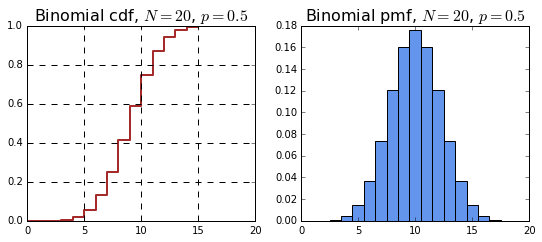

In [81]:
xx = np.arange(N+1)
cdf = rv_binom.cdf(xx)
pmf = rv_binom.pmf(xx)
xvalues = np.arange(N+1)
plt.figure(figsize=(9,3.5))
plt.subplot(1,2,1)
plt.step(xvalues, cdf, lw=2, color='brown')
plt.grid(lw=1, ls='dashed')
plt.title('Binomial cdf, $N=20$, $p=0.5$', fontsize=16)
plt.subplot(1,2,2)
left = xx - 0.5
plt.bar(left, pmf, 1.0, color='CornflowerBlue')
plt.title('Binomial pmf, $N=20$, $p=0.5$', fontsize=16)
plt.axis([0, 20, 0, .18]);

In [82]:
mean = rv_binom.mean()
std = rv_binom.std()
print(mean, std)

10.0 2.23606797749979


In [83]:
mean = N * p
std = np.sqrt(N * p * (1 - p))
print(mean, std)

10.0 2.23606797749979


In [85]:
binorm_variates = stats.multivariate_normal.rvs(mean=[0,0], size=300)
df = DataFrame(binorm_variates, columns=['Z1', 'Z2'])
df.head(10)

,Z1,Z2
0,-0.682398,0.867300
1,1.922781,0.286467
2,1.511207,0.597848
3,0.641062,-0.011957
4,-0.051982,1.544946
5,0.311116,1.751772
6,-0.080933,-0.062592
7,-0.044515,-0.025439
8,-1.611876,-0.799879
9,-0.870392,-0.814078


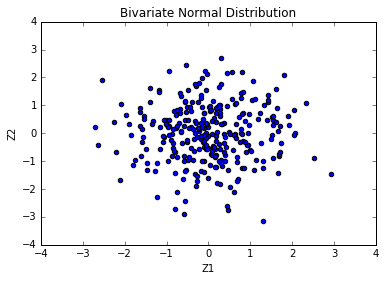

In [86]:
df.plot(kind='scatter', x='Z1', y='Z2')
plt.title('Bivariate Normal Distribution')
plt.axis([-4,4,-4,4]);